**READING THE DATASET**

In [120]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

# Importing all necessary libraries

from math import sqrt
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from functools import partial
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from bayes_opt import BayesianOptimization
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold
from pprint import pprint

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

: 

In [32]:
train = pd.read_csv('./ReNew_Participants_Data/train.csv')
test = pd.read_csv('./ReNew_Participants_Data/test.csv')

print("The Wind Turbine training dataset has", train.shape[0], "records, each with",train.shape[1],"attributes.")
print("The Wind Turbine test dataset has", test.shape[0], "records, each with",test.shape[1],"attributes.")

train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.
The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [37]:
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465


In [34]:
# Drop the timestamp column
train.drop(['timestamp', 'turbine_id'], axis=1,inplace=True)
test.drop('turbine_id', axis=1, inplace=True)

In [35]:
# Check for null
train.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
dtype: int64

There are no NULL values to deal with.

In [38]:
#Creating a Numerical dataframe and omitting Timestamp column
#train_num = train.select_dtypes(["float64"])
#rain_cat = train.select_dtypes(["object"])
train.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,54.346095


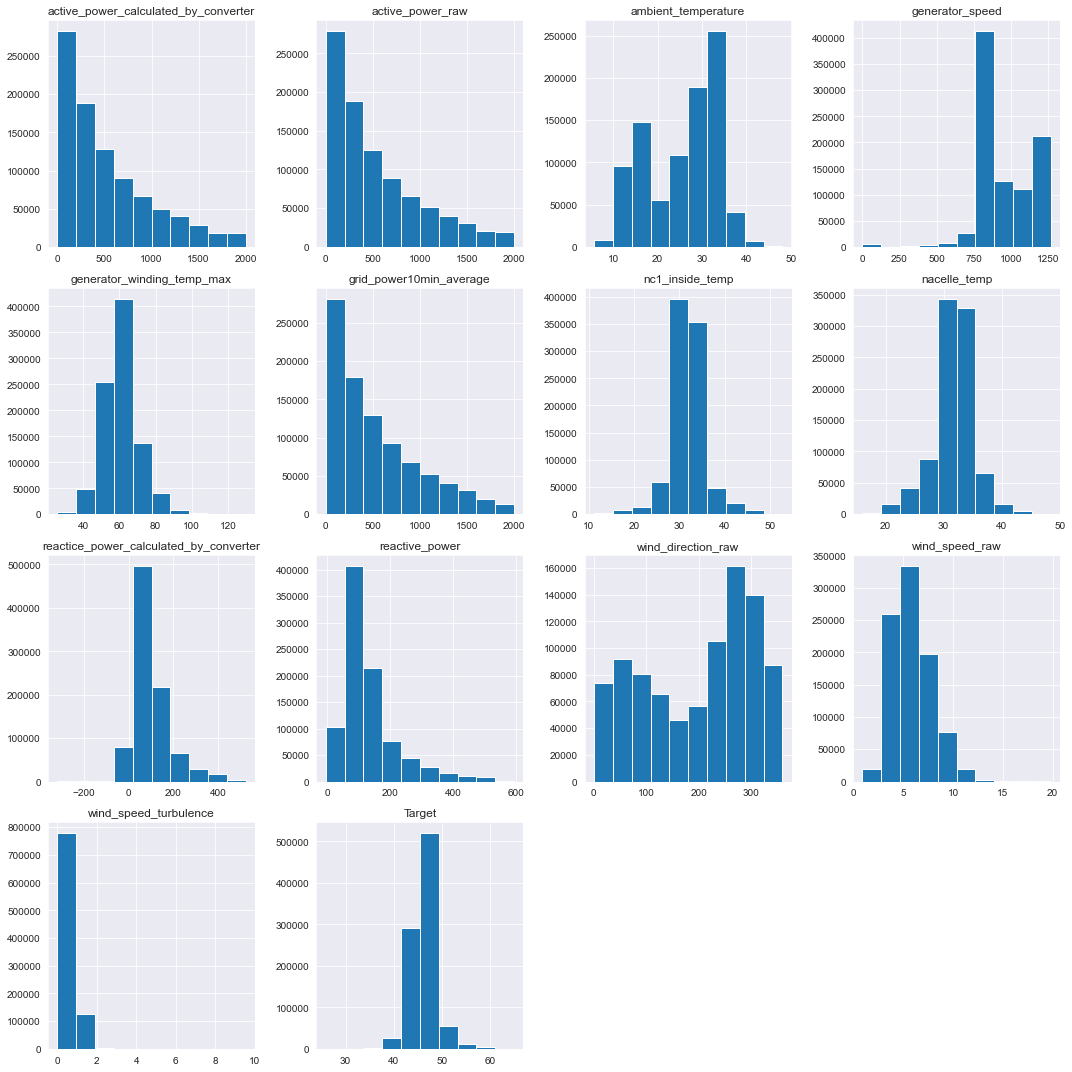

In [40]:
train.hist(figsize = (15, 15))
plt.tight_layout()
plt.show()

In [41]:
train.skew(axis=0)

active_power_calculated_by_converter      1.094894
active_power_raw                          1.079560
ambient_temperature                      -0.405606
generator_speed                          -0.432870
generator_winding_temp_max                0.482791
grid_power10min_average                   1.008062
nc1_inside_temp                           0.040530
nacelle_temp                             -0.427542
reactice_power_calculated_by_converter    1.731298
reactive_power                            1.638332
wind_direction_raw                       -0.363971
wind_speed_raw                            0.718327
wind_speed_turbulence                     2.205472
Target                                    0.705359
dtype: float64

**DATA VISUALIZATION**

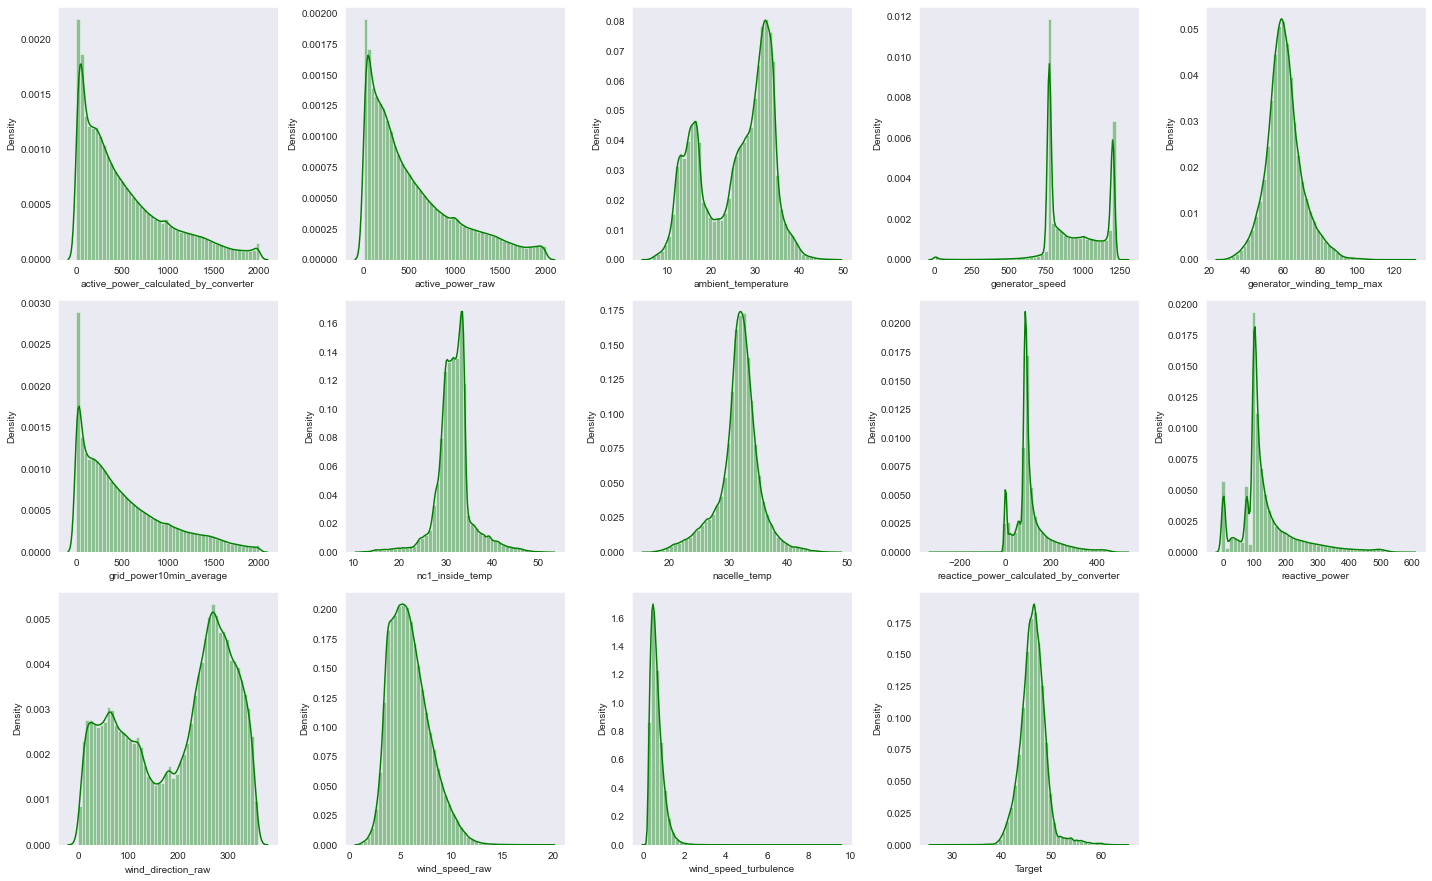

In [42]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train)):
    plt.subplot(4,5,i+1)
    sns.distplot(train[col], color='g', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

**Inference**

1. **Target, nacelle_temp, generator_wind_temp_max** - normally distributed. Hence no need to scale.

2. **active_power_calculated_by_converter, active_power_raw, grid_power10min_average , wind_speed_raw, wind_speed_turbulence** are **skewed**, - need to scale.

3. **ambient_temperature , generator_speed, reactice_power_calculated_by_converter, reactive_power, wind_direction_raw** distributions are bi-model. We will scale and check how they look.

In [43]:
log_feature = ['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']

In [44]:
for x in log_feature:
    train[x] = train[x].apply(lambda t : 0.000001 if t <= 0 else t)
    train[x] = np.log(train[x])
    test[x] = test[x].apply(lambda t : 0.000001 if t <= 0 else t)
    test[x] = np.log(test[x])

In [45]:
train.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,6.705194,6.727333,3.456139,7.055845,4.188961,6.822085,3.462041,3.450137,4.952000,5.108980,5.637873,1.954020,-0.608656,47.582787
1,6.038128,6.042754,2.556836,6.833837,4.087174,6.099319,3.478890,3.489079,4.490729,4.734752,5.702290,1.700181,-0.757086,46.070328
2,7.172832,7.198607,2.812313,7.091093,4.115298,7.218702,2.437714,2.908702,5.440781,5.639963,4.442182,2.090932,-0.474304,39.989236
3,4.118954,3.979327,3.345971,6.646139,3.705598,2.661999,3.533780,3.486240,4.192847,4.317722,4.468905,1.403897,-0.273491,46.056587
4,6.386061,6.416175,3.450607,6.953605,4.164209,6.395295,3.478331,3.448920,4.921177,5.076438,5.748516,1.849705,-1.061119,54.346095


In [46]:
# # For One Encoding for Training Date Sets
# from sklearn.preprocessing import LabelEncoder

# # Label Encoding the categorical columns
# le = LabelEncoder()

# # Encode turbine_id in train dataset
# le.fit(train_cat.turbine_id)
# train_cat.turbine_id = le.transform(train_cat.turbine_id)

# # Encode turbine_id in test dataset
# le.fit(test.turbine_id)
# test.turbine_id = le.transform(test.turbine_id)

In [47]:
# train = pd.concat([train_num, train_cat], axis=1)
# train.head()

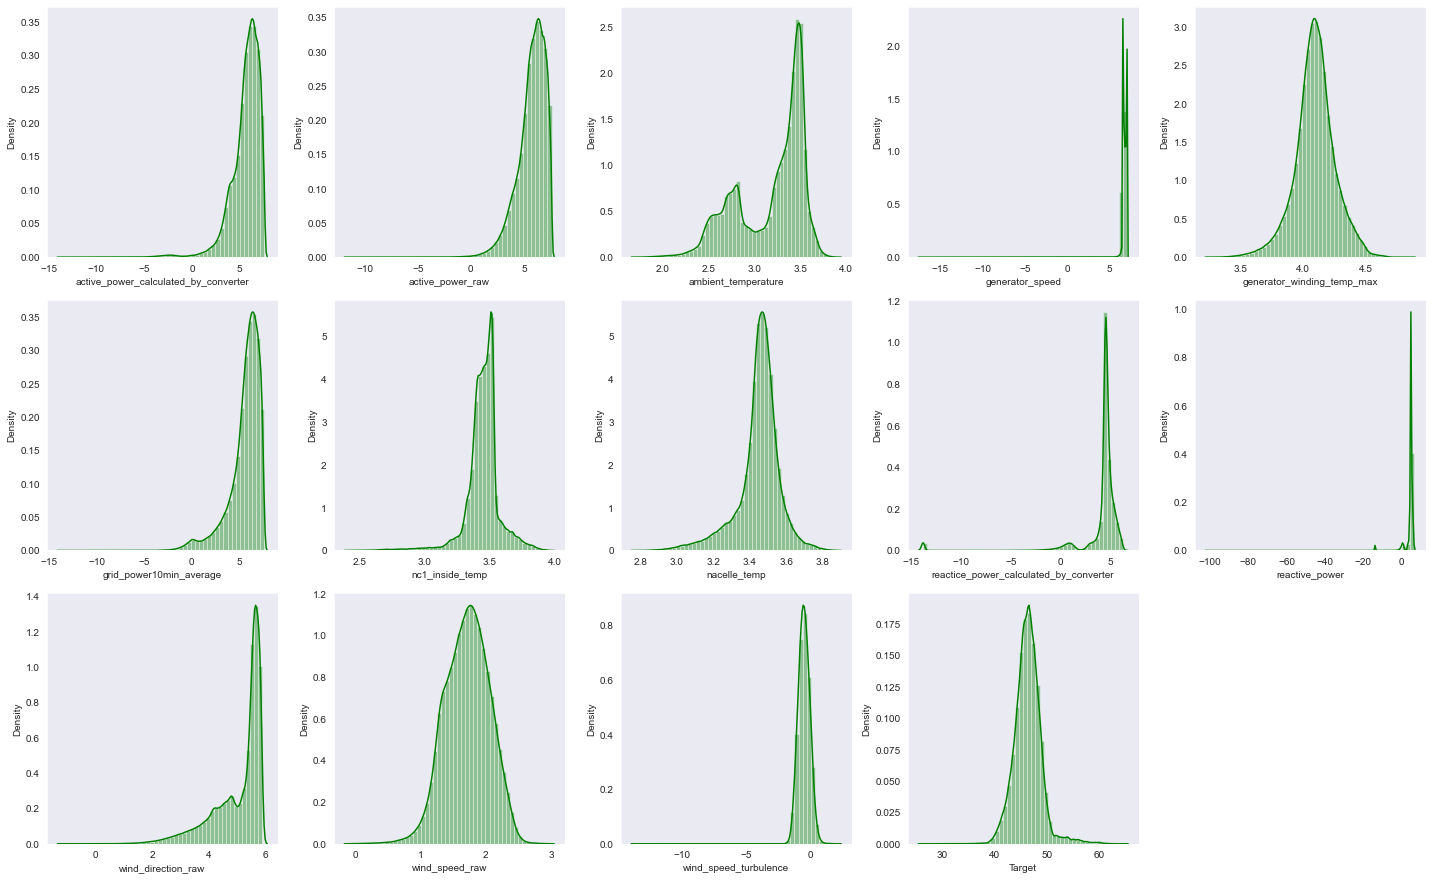

In [48]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train)):
    plt.subplot(4,5,i+1)
    sns.distplot(train[col], color='g', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

# **SCALING FEATURES**

In [49]:
# Scaling the Data Sets 
from sklearn.preprocessing import StandardScaler

scale_features = ['active_power_calculated_by_converter', 'active_power_raw','ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
                   'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp','reactice_power_calculated_by_converter', 'reactive_power',
                   'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']
scale = StandardScaler()
for fs in scale_features:
    train[fs] = scale.fit_transform(train[[fs]])
    test[fs] = scale.fit_transform(test[[fs]])

In [50]:
train.skew(axis=0)

active_power_calculated_by_converter      -2.070053
active_power_raw                          -1.189463
ambient_temperature                       -0.811184
generator_speed                          -16.908310
generator_winding_temp_max                -0.229396
grid_power10min_average                   -1.745006
nc1_inside_temp                           -1.372696
nacelle_temp                              -1.078643
reactice_power_calculated_by_converter    -5.645137
reactive_power                           -12.513448
wind_direction_raw                        -1.490540
wind_speed_raw                            -0.241306
wind_speed_turbulence                     -0.541470
Target                                     0.705359
dtype: float64

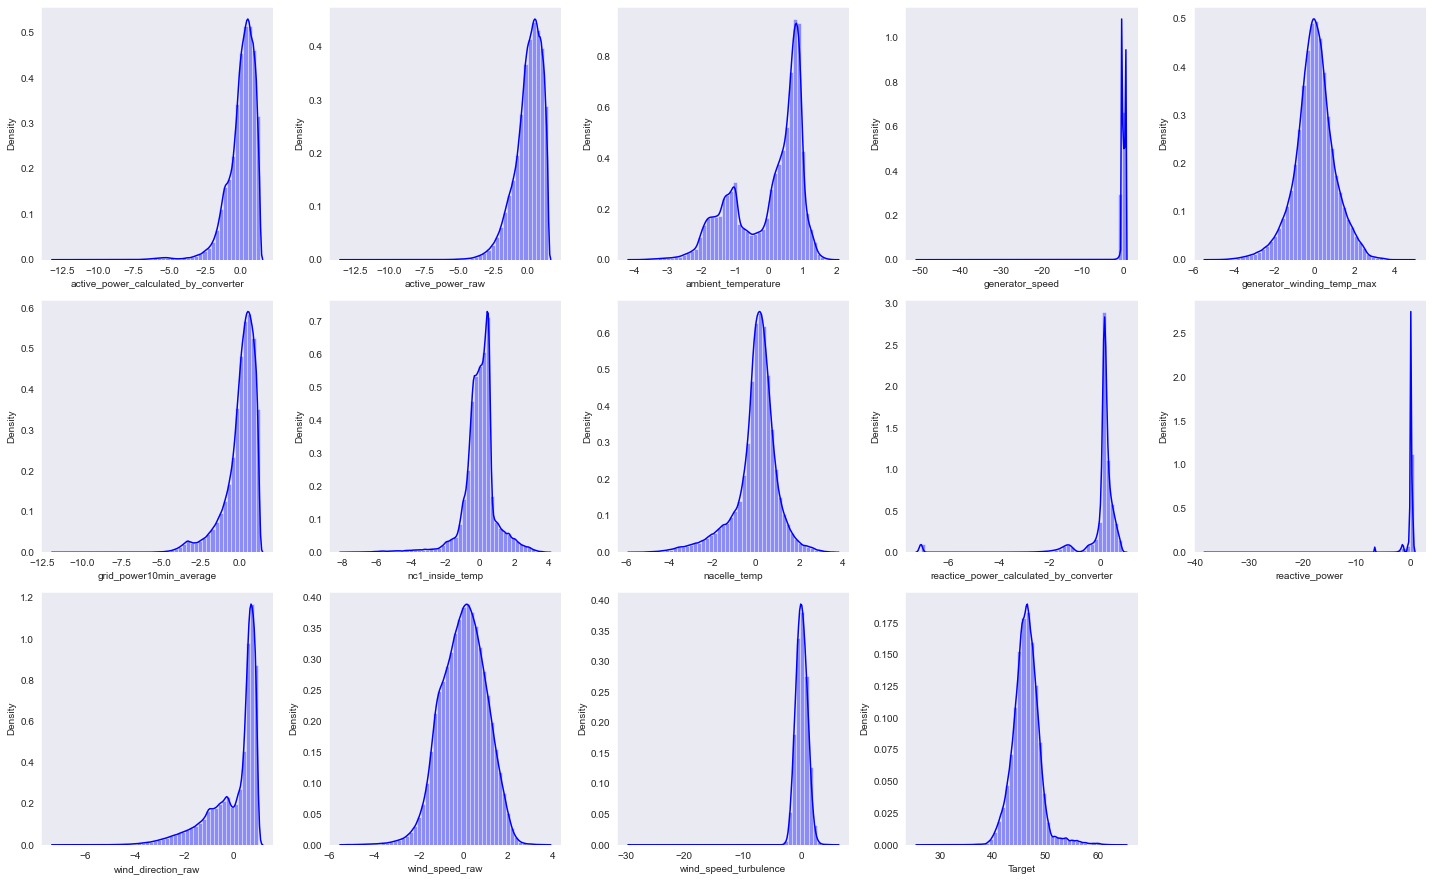

In [51]:
# Plotting the distributions of the numerical features after applying log transformation and scaling
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train)):
    plt.subplot(4,5,i+1)
    sns.distplot(train[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

# **FEATURE SELECTION**

In [52]:
X = train.drop('Target', axis=1)
y = train['Target']

In [53]:
X.shape[1]

13

In [54]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.713967,0.775973,0.750813,0.546957,0.592831,0.766860,0.092507,0.008158,0.340740,0.293846,0.688164,0.694710,-0.175622
1,0.267439,0.248789,-1.707336,0.084568,-0.040229,0.329486,0.221244,0.337520,0.158568,0.159423,0.762524,-0.051841,-0.504645
2,1.026999,1.138895,-1.009015,0.620371,0.134689,1.006868,-7.733947,-4.571166,0.533776,0.484575,-0.692104,1.097374,0.122194
3,-1.017238,-1.340225,0.449681,-0.306365,-2.413439,-1.750572,0.640638,0.313503,0.040925,0.009626,-0.661256,-0.923224,0.567334
4,0.500342,0.536356,0.735692,0.334015,0.438887,0.508592,0.216973,-0.002137,0.328566,0.282157,0.815886,0.387915,-1.178592


**Correlation check for multi-collinearity**

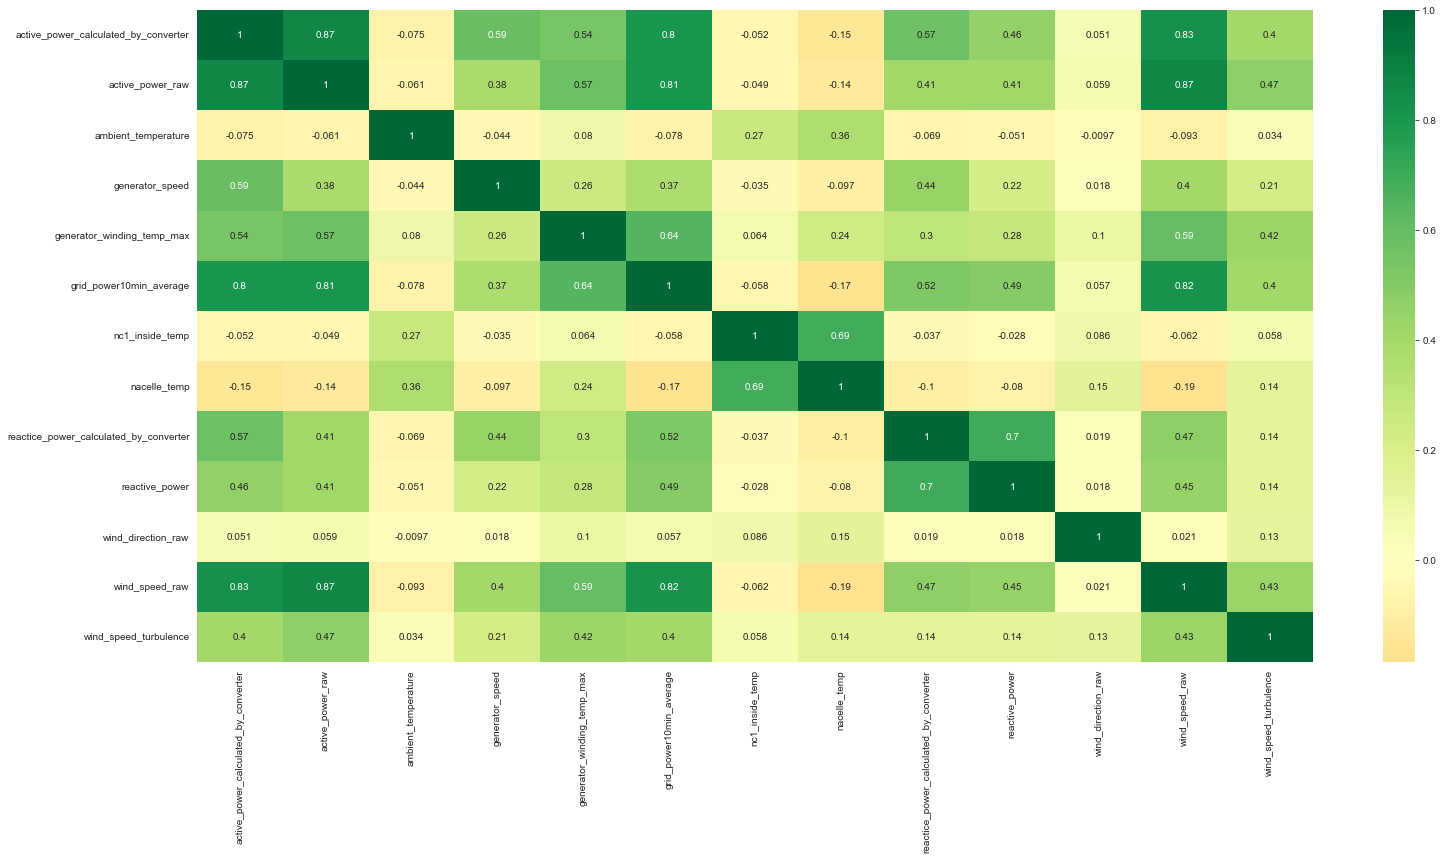

In [55]:
# Plotting a heatmap plot

from turtle import color
plt.figure(figsize=(25,12))
p = sns.heatmap(data=X.corr(method='pearson'), cmap='RdYlGn', annot=True, center=0)

**Correlation of Independent Variables**

Based on the coefficient values some of the independent variables are highly correlated to each other (value >=0.8). This means we may need to drop one of these to ensure we do not overfit the model. We will analyze further with some other methods (VIF, Feature Selection and Embedded methods) to come to an optimal set of features.

* active_power_calculated_by_converter & active_power_raw 
* active_power_calculated_by_converter & wind_speed_raw
* active_power_calculated_by_converter & grid_power10min_average
* active_power_raw & wind_speed_raw
* active_power_raw & grid_power10min_average
* generator_speed & active_power_calculated_by_converter  
* reactice_power_calculated_by_converter & reactive_power

In [56]:
X.corrwith(y)

active_power_calculated_by_converter     -0.044264
active_power_raw                         -0.040752
ambient_temperature                       0.401813
generator_speed                          -0.027191
generator_winding_temp_max                0.301815
grid_power10min_average                  -0.050655
nc1_inside_temp                           0.205364
nacelle_temp                              0.509125
reactice_power_calculated_by_converter   -0.036458
reactive_power                           -0.024747
wind_direction_raw                        0.073833
wind_speed_raw                           -0.072810
wind_speed_turbulence                     0.080449
dtype: float64

**VIF Check**

In [57]:
# Import VIF library for multi-collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calc_vif(dataframe):

    # calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif = vif.sort_values(ascending=False, by="VIF")
    return(vif)

calc_vif(X) 

,Variables,VIF
0,active_power_calculated_by_converter,7.473299
1,active_power_raw,7.143173
11,wind_speed_raw,5.565325
5,grid_power10min_average,4.732046
7,nacelle_temp,3.048436
8,reactice_power_calculated_by_converter,2.634672
4,generator_winding_temp_max,2.563647
9,reactive_power,2.145109
6,nc1_inside_temp,2.138936
3,generator_speed,1.822682


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

**Wrapper Methods**

* Sequential Feature Selector - Forward Selection 
* Backward Elimination - Recursive Feature Elimination (RFE)
* Stepwise Selection: Bi-directional with a combination of Forward Selection & Backward Elimination

**Forward Selection Method - SFS() from Mlxtend**

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.3s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.5s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.6s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.5s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.5s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.4s finished
Features: 6/13[Parallel(

                                 Feature     Score
0   active_power_calculated_by_converter  0.393765
1                       active_power_raw  0.393765
2                    ambient_temperature  0.393765
3                        generator_speed  0.393765
4             generator_winding_temp_max  0.393765
5                grid_power10min_average  0.393765
6                        nc1_inside_temp  0.393765
7                           nacelle_temp  0.393765
8                         reactive_power  0.393765
9                     wind_direction_raw  0.393765
10                        wind_speed_raw  0.393765
11                 wind_speed_turbulence  0.393765


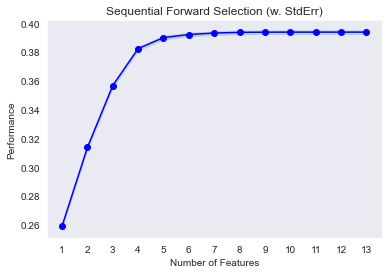

In [58]:
# Sequential Feature Selection (SFS)
sfs = SFS(LinearRegression(), forward=True, floating=False, scoring='r2', cv=5, k_features='best', verbose=1)
sfs.fit(X, y)

feat_names = pd.DataFrame({'Feature' : sfs.k_feature_names_, 'Score' : sfs.k_score_})
print(feat_names.sort_values(by=['Score'], ascending=False))

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    8.9s finished
Features: 12/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    7.9s finished
Features: 11/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.7s finished
Features: 10/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.7s finished
Features: 9/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.3s finished
Features: 8/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.7s finished
Features: 7/1[Parallel(n_j

                                 Feature     Score
0   active_power_calculated_by_converter  0.393765
1                       active_power_raw  0.393765
2                    ambient_temperature  0.393765
3                        generator_speed  0.393765
4             generator_winding_temp_max  0.393765
5                grid_power10min_average  0.393765
6                        nc1_inside_temp  0.393765
7                           nacelle_temp  0.393765
8                         reactive_power  0.393765
9                     wind_direction_raw  0.393765
10                        wind_speed_raw  0.393765
11                 wind_speed_turbulence  0.393765


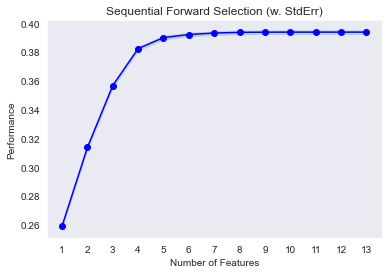

In [59]:
# Sequential Feature Selection (SFS)
sfs_b = SFS(LinearRegression(), forward=False, floating=False, scoring='r2', cv=5, k_features='best', verbose=1)
sfs_b.fit(X, y)

feat_names_1 = pd.DataFrame({'Feature' : sfs_b.k_feature_names_, 'Score' : sfs_b.k_score_})
print(feat_names_1.sort_values(by=['Score'], ascending=False))

fig = plot_sfs(sfs_b.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

**SelectKBest with Pearson's f_regression**

In [60]:
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X,y)

feat_scores = pd.DataFrame({'Feature': X.columns, 'Pearsons Score' : fit.scores_})
print(feat_scores.sort_values(by=['Pearsons Score'], ascending=False))

                                   Feature  Pearsons Score
7                             nacelle_temp   318276.891616
2                      ambient_temperature   175134.720688
4               generator_winding_temp_max    91161.727741
6                          nc1_inside_temp    40050.969787
12                   wind_speed_turbulence     5925.334239
10                      wind_direction_raw     4985.705951
11                          wind_speed_raw     4847.834573
5                  grid_power10min_average     2339.974133
0     active_power_calculated_by_converter     1785.647883
1                         active_power_raw     1513.075870
8   reactice_power_calculated_by_converter     1210.630686
3                          generator_speed      673.008545
9                           reactive_power      557.392202


In [61]:
Kbest_features = feat_scores.nlargest(12, 'Pearsons Score')
print(Kbest_features)

                                   Feature  Pearsons Score
7                             nacelle_temp   318276.891616
2                      ambient_temperature   175134.720688
4               generator_winding_temp_max    91161.727741
6                          nc1_inside_temp    40050.969787
12                   wind_speed_turbulence     5925.334239
10                      wind_direction_raw     4985.705951
11                          wind_speed_raw     4847.834573
5                  grid_power10min_average     2339.974133
0     active_power_calculated_by_converter     1785.647883
1                         active_power_raw     1513.075870
8   reactice_power_calculated_by_converter     1210.630686
3                          generator_speed      673.008545


**Recursive Forward Elimination Method RFE() from Sklearn**

In [62]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
np.random.seed(123)
#names = pd.DataFrame(X.columns)
model = LinearRegression()

#Define RFE 
rfe = RFECV(model, step=1, cv=150) 
my_values = rfe.fit(X,y)

#Create a dataframe for the results
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {
            'Feature' : X.columns[i],
            'Selected' : my_values.support_[i],
            'RFE_Ranking' : my_values.ranking_[i]
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name = 'Columns'
df_RFE_results

,Feature,Selected,RFE_Ranking
Columns,,,
0,active_power_calculated_by_converter,True,1
1,active_power_raw,True,1
2,ambient_temperature,True,1
3,generator_speed,True,1
4,generator_winding_temp_max,True,1
5,grid_power10min_average,True,1
6,nc1_inside_temp,True,1
7,nacelle_temp,True,1
8,reactice_power_calculated_by_converter,True,1


In [63]:
RFE_features = df_RFE_results[df_RFE_results['RFE_Ranking'] == 1]
print(RFE_features)

                                        Feature  Selected  RFE_Ranking
Columns                                                               
0          active_power_calculated_by_converter      True            1
1                              active_power_raw      True            1
2                           ambient_temperature      True            1
3                               generator_speed      True            1
4                    generator_winding_temp_max      True            1
5                       grid_power10min_average      True            1
6                               nc1_inside_temp      True            1
7                                  nacelle_temp      True            1
8        reactice_power_calculated_by_converter      True            1
9                                reactive_power      True            1
10                           wind_direction_raw      True            1
11                               wind_speed_raw      True            1
12    

In [64]:
feat_list = {
            'SFS Forward' : feat_names['Feature'],
            'SFS Backward' : feat_names_1['Feature'],
            'SelectKBest' : Kbest_features['Feature'],
            'RFECV' : RFE_features['Feature']
            }
key_features = pd.DataFrame(feat_list)
key_features = key_features.apply(lambda x: pd.Series(x.dropna().values))
key_features

,SFS Forward,SFS Backward,SelectKBest,RFECV
0,active_power_calculated_by_converter,active_power_calculated_by_converter,active_power_calculated_by_converter,active_power_calculated_by_converter
1,active_power_raw,active_power_raw,active_power_raw,active_power_raw
2,ambient_temperature,ambient_temperature,ambient_temperature,ambient_temperature
3,generator_speed,generator_speed,generator_speed,generator_speed
4,generator_winding_temp_max,generator_winding_temp_max,generator_winding_temp_max,generator_winding_temp_max
5,grid_power10min_average,grid_power10min_average,grid_power10min_average,grid_power10min_average
6,nc1_inside_temp,nc1_inside_temp,nc1_inside_temp,nc1_inside_temp
7,nacelle_temp,nacelle_temp,nacelle_temp,nacelle_temp
8,reactive_power,reactive_power,reactice_power_calculated_by_converter,reactice_power_calculated_by_converter
9,wind_direction_raw,wind_direction_raw,wind_direction_raw,reactive_power


In [65]:
X = X.drop('reactice_power_calculated_by_converter', axis=1)
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.713967,0.775973,0.750813,0.546957,0.592831,0.766860,0.092507,0.008158,0.293846,0.688164,0.694710,-0.175622
1,0.267439,0.248789,-1.707336,0.084568,-0.040229,0.329486,0.221244,0.337520,0.159423,0.762524,-0.051841,-0.504645
2,1.026999,1.138895,-1.009015,0.620371,0.134689,1.006868,-7.733947,-4.571166,0.484575,-0.692104,1.097374,0.122194
3,-1.017238,-1.340225,0.449681,-0.306365,-2.413439,-1.750572,0.640638,0.313503,0.009626,-0.661256,-0.923224,0.567334
4,0.500342,0.536356,0.735692,0.334015,0.438887,0.508592,0.216973,-0.002137,0.282157,0.815886,0.387915,-1.178592


# Train Test Split

In [71]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(818643, 12) (818643,) (90961, 12) (90961,)


# **BUILDING A BASE MODEL** 

**LINEAR REGRESSION**

In [72]:
%%time
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_test, y_test))*100
mape_lr = mean_absolute_percentage_error(y_test, lr_pred)

print(f"Training accuracy: {lr_train_acc} %")
print(f"Validation accuracy: {lr_val_acc} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr}")

Training accuracy: 39.356441815308926 %
Validation accuracy: 39.589691029416485 %
Linear Regression Mean Absolute Percent Error: 0.030257559153053806
CPU times: user 423 ms, sys: 114 ms, total: 537 ms
Wall time: 193 ms


**RANDOM FOREST REGRESSION**

In [73]:
%%time
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_test, y_test))*100
mape_rf = mean_absolute_percentage_error(y_test, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 97.07070296659256 %
Validation accuracy: 79.09052987183244 %
Random Forest Model Mean Absolute Percent Error: 0.015578331745750074
CPU times: user 19min 55s, sys: 12 s, total: 20min 7s
Wall time: 20min 19s


In [74]:
pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False)

,Score
ambient_temperature,0.255234
nacelle_temp,0.234884
generator_winding_temp_max,0.108621
nc1_inside_temp,0.102705
wind_direction_raw,0.082964
grid_power10min_average,0.061103
reactive_power,0.038519
wind_speed_turbulence,0.035010
active_power_calculated_by_converter,0.027566
wind_speed_raw,0.020377


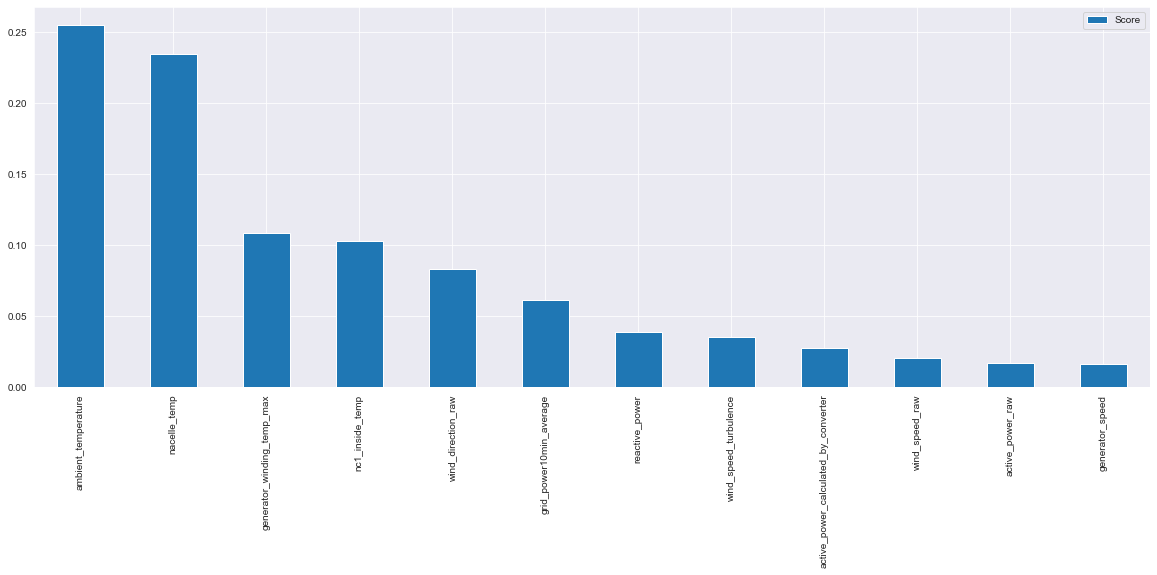

In [75]:
pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False).plot(kind = 'bar', figsize=(20,7))
plt.show()

**LIGHTGBM REGRESSION**

In [76]:
%%time
lgb_model = LGBMRegressor(n_estimators=1000)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

lgb_train_acc = (lgb_model.score(X_train, y_train))*100
lgb_val_acc = (lgb_model.score(X_test, y_test))*100
mape_lgb = mean_absolute_percentage_error(y_test, lgb_pred)

print(f"Training accuracy: {lgb_train_acc} %")
print(f"Validation accuracy: {lgb_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_lgb}")

Training accuracy: 74.23035566205809 %
Validation accuracy: 71.7368921743906 %
CatBoost Model Mean Absolute Percent Error: 0.020321098800492203
CPU times: user 1min 56s, sys: 6.44 s, total: 2min 2s
Wall time: 17.2 s


**LASSO & RIDGE REGRESSION**

In [79]:
# %%time
# # Initiate a ridge object and fit to the training data
# ridge = Ridge(alpha=0.1, fit_intercept=True, normalize=True)
# ridge.fit(X_train, y_train)
# rg_pred = ridge.predict(X_test)

# rg_train_acc = ridge.score(X_train, y_train)*100
# rg_val_acc = ridge.score(X_test, y_test)*100
# mape_rg = mean_absolute_percentage_error(y_test, rg_pred)

# print(f"Training accuracy: {rg_train_acc} %")
# print(f"Validation accuracy: {rg_val_acc} %")
# print(f"Ridge Mean Absolute Percent Error: {mape_rg}")

In [80]:
# %%time
# # Initiate a Lasso object and fit to the training data
# lasso = Lasso(random_state=1)
# lasso.fit(X_train, y_train)
# ls_pred = lasso.predict(X_test)

# ls_train_acc = lasso.score(X_train, y_train)*100
# ls_val_acc = lasso.score(X_test, y_test)*100
# mape_ls = mean_absolute_percentage_error(y_test, ls_pred)

# print(f"Training accuracy: {ls_train_acc} %")
# print(f"Validation accuracy: {ls_val_acc} %")
# print(f"Lasso Mean Absolute Percent Error: {mape_ls}")

**XGB REGRESSION**

In [81]:
%%time
# XG Boost Regressor
XGB_model = XGBRegressor(booster='gbtree', n_estimators=200, max_depth=12, random_state=42)
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_test)

xg_train_acc = (XGB_model.score(X_train, y_train))*100
xg_val_acc = (XGB_model.score(X_test, y_test))*100
mape_xg = mean_absolute_percentage_error(y_test, XGB_pred)

print(f"Training accuracy: {xg_train_acc} %")
print(f"Validation accuracy: {xg_val_acc} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xg}")

Training accuracy: 89.3540094715229 %
Validation accuracy: 76.17938718123091 %
XGBoost Model Mean Absolute Percent Error: 0.01823840855721839
CPU times: user 25min 14s, sys: 1min 15s, total: 26min 30s
Wall time: 3min 31s


**CATBOOST REGRESSOR**

In [82]:
%%time
from catboost import CatBoostRegressor, cv

cat_model = CatBoostRegressor(iterations=200, learning_rate=0.7, loss_function='MAPE', random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

cat_train_acc = (cat_model.score(X_train, y_train))*100
cat_val_acc = (cat_model.score(X_test, y_test))*100
mape_cat = mean_absolute_percentage_error(y_test, cat_pred)

print(f"Training accuracy: {cat_train_acc} %")
print(f"Validation accuracy: {cat_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

0:	learn: 0.0349138	total: 148ms	remaining: 29.5s
1:	learn: 0.0313728	total: 209ms	remaining: 20.7s
2:	learn: 0.0295426	total: 274ms	remaining: 18s
3:	learn: 0.0285533	total: 331ms	remaining: 16.2s
4:	learn: 0.0278736	total: 391ms	remaining: 15.2s
5:	learn: 0.0274260	total: 464ms	remaining: 15s
6:	learn: 0.0271473	total: 519ms	remaining: 14.3s
7:	learn: 0.0269289	total: 575ms	remaining: 13.8s
8:	learn: 0.0266920	total: 632ms	remaining: 13.4s
9:	learn: 0.0265678	total: 692ms	remaining: 13.1s
10:	learn: 0.0264347	total: 748ms	remaining: 12.9s
11:	learn: 0.0259660	total: 817ms	remaining: 12.8s
12:	learn: 0.0258210	total: 873ms	remaining: 12.6s
13:	learn: 0.0257423	total: 935ms	remaining: 12.4s
14:	learn: 0.0256614	total: 992ms	remaining: 12.2s
15:	learn: 0.0255776	total: 1.05s	remaining: 12s
16:	learn: 0.0254792	total: 1.1s	remaining: 11.9s
17:	learn: 0.0253043	total: 1.17s	remaining: 11.8s
18:	learn: 0.0251363	total: 1.22s	remaining: 11.6s
19:	learn: 0.0250744	total: 1.28s	remaining: 11.

**EXTRA TREES REGRESSOR**

In [83]:
%%time
etr_model = ExtraTreesRegressor(n_estimators=200, max_depth=12, random_state=42)
etr_model.fit(X_train, y_train)
etr_pred = etr_model.predict(X_test)

etr_train_acc = (etr_model.score(X_train, y_train))*100
etr_val_acc = (etr_model.score(X_test, y_test))*100
mape_etr = mean_absolute_percentage_error(y_test, cat_pred)

print(f"Training accuracy: {etr_train_acc} %")
print(f"Validation accuracy: {etr_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_etr}")

Training accuracy: 57.68302323705849 %
Validation accuracy: 57.214273217080745 %
CatBoost Model Mean Absolute Percent Error: 0.022052979014716742
CPU times: user 2min 26s, sys: 445 ms, total: 2min 26s
Wall time: 2min 26s


**BASE MODEL COMPARISON**

In [84]:
models = pd.DataFrame(
    {
    'Model Name': ['Linear','Random Forest','LightGBM','XGBoost','CatBoost', 'Extra Trees'],
    'Training Accuracy' : [lr_train_acc,rf_train_acc,lgb_train_acc,xg_train_acc, cat_train_acc, etr_train_acc],
    'Validation Accuracy' : [lr_val_acc, rf_val_acc,lgb_val_acc,xg_val_acc, cat_val_acc, etr_val_acc],
    'MAPE Score' : [mape_lr, mape_rf, mape_lgb,mape_xg,mape_cat, mape_etr]
    }
)

models.sort_values(by = ['MAPE Score'],ascending = True)

,Model Name,Training Accuracy,Validation Accuracy,MAPE Score
1,Random Forest,97.070703,79.090530,0.015578
3,XGBoost,89.354009,76.179387,0.018238
2,LightGBM,74.230356,71.736892,0.020321
4,CatBoost,58.713949,58.641694,0.022053
5,Extra Trees,57.683023,57.214273,0.022053
0,Linear,39.356442,39.589691,0.030258


# **PREDICTION**

**Predict using Base Model with the lowest MAPE score - Random Forest Regressor**

In [88]:
test = pd.read_csv("./ReNew_Participants_Data/test.csv")

In [90]:
log_feature = ['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']

for x in log_feature:
    test[x] = test[x].apply(lambda t : 0.000001 if t <= 0 else t)
    test[x] = np.log(test[x])

# Scaling the Data Sets 
from sklearn.preprocessing import StandardScaler

scale_features = ['active_power_calculated_by_converter', 'active_power_raw','ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
                   'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp','reactice_power_calculated_by_converter', 'reactive_power',
                   'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']
scale = StandardScaler()
for fs in scale_features:
    test[fs] = scale.fit_transform(test[[fs]])

In [93]:
test = test.drop('turbine_id', axis=1)
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,-1.929521,-2.095424,1.403021,-1.617862,-0.278695,-0.682156,3.343428,3.096077,-1.265555,-1.406581,0.011522,-2.431762,0.652147
1,0.347787,0.347644,-1.840679,0.163850,-0.914244,0.389125,-1.049163,-2.286866,0.188392,0.176103,-1.165277,0.169074,-0.174013
2,0.311938,0.302598,0.516558,0.126712,0.053045,0.252621,1.708582,1.068287,0.163387,0.169453,0.429097,0.181297,-0.302606
3,-0.065976,-0.153132,0.318401,-0.214304,-0.456751,-0.224921,-0.507638,-0.091102,0.159087,0.130213,0.187522,-0.688101,-0.600196
4,0.954801,1.056607,0.788729,0.617573,0.715052,0.884482,0.100122,-0.169763,0.456748,0.421456,0.605804,0.999050,-0.104877


In [95]:
test = test.drop('reactice_power_calculated_by_converter', axis=1)
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,-1.929521,-2.095424,1.403021,-1.617862,-0.278695,-0.682156,3.343428,3.096077,-1.406581,0.011522,-2.431762,0.652147
1,0.347787,0.347644,-1.840679,0.163850,-0.914244,0.389125,-1.049163,-2.286866,0.176103,-1.165277,0.169074,-0.174013
2,0.311938,0.302598,0.516558,0.126712,0.053045,0.252621,1.708582,1.068287,0.169453,0.429097,0.181297,-0.302606
3,-0.065976,-0.153132,0.318401,-0.214304,-0.456751,-0.224921,-0.507638,-0.091102,0.130213,0.187522,-0.688101,-0.600196
4,0.954801,1.056607,0.788729,0.617573,0.715052,0.884482,0.100122,-0.169763,0.421456,0.605804,0.999050,-0.104877


In [96]:
#test = test.drop(['active_power_calculated_by_converter','active_power_raw', 'reactive_power', 'reactice_power_calculated_by_converter'], axis=1)
test_pred = rf_model.predict(test)
submission = pd.DataFrame()
submission['Target'] = test_pred
submission['Target'].head()
submission['Target'].to_csv('./ReNew_Participants_Data/1309_my_submission.csv', index=False)

In [97]:
submission.head()

,Target
0,49.913729
1,41.323786
2,48.491739
3,45.489945
4,45.640626


In [98]:
etr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
lgbmr = LGBMRegressor()
xgbr = XGBRegressor()
cbr = CatBoostRegressor()
est_preds = []
for x,y in zip([etr,rfr,lgbmr,xgbr,cbr],['etr','rfr','lgbmr','xgbr','cbr']):
    x.fit(X_train, y_train)
    print('{} has test mape of {}'.format(y,mean_absolute_percentage_error(y_test, x.predict(X_test))))
    est_preds.append(x.predict(test))

etr has test mape of 0.01477815326408896
rfr has test mape of 0.015560152712410104
lgbmr has test mape of 0.02337777521832964
xgbr has test mape of 0.021872589003783652
Learning rate set to 0.128805
0:	learn: 2.4968019	total: 46.7ms	remaining: 46.7s
1:	learn: 2.3968855	total: 75.3ms	remaining: 37.6s
2:	learn: 2.3129306	total: 104ms	remaining: 34.6s
3:	learn: 2.2463322	total: 137ms	remaining: 34.2s
4:	learn: 2.1865376	total: 166ms	remaining: 33.1s
5:	learn: 2.1373208	total: 195ms	remaining: 32.3s
6:	learn: 2.0981847	total: 223ms	remaining: 31.6s
7:	learn: 2.0639340	total: 251ms	remaining: 31.1s
8:	learn: 2.0348142	total: 279ms	remaining: 30.8s
9:	learn: 2.0098611	total: 312ms	remaining: 30.9s
10:	learn: 1.9901969	total: 340ms	remaining: 30.6s
11:	learn: 1.9721071	total: 367ms	remaining: 30.3s
12:	learn: 1.9568302	total: 397ms	remaining: 30.2s
13:	learn: 1.9311929	total: 425ms	remaining: 30s
14:	learn: 1.9195455	total: 451ms	remaining: 29.6s
15:	learn: 1.8999756	total: 482ms	remaining: 2

In [112]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, SparkTrials

def objective(search_space):
    etr = ExtraTreesRegressor(criterion = search_space["criterion"],
                                max_depth = int(search_space["max_depth"]),
                                min_samples_split = int(search_space["min_samples_split"]),
                                min_samples_leaf = int(search_space["min_samples_leaf"]),
                                max_features = search_space["max_features"],
                                n_estimators = int(search_space["n_estimators"]), 
                                n_jobs = -1,
                                random_state = 42)
                              
    etr.fit(X_train, y_train)
    etr_pred = etr.predict(X_test)
    etr_mape = mean_absolute_percentage_error(y_test, etr_pred)
    return {"loss": etr_mape, "status": STATUS_OK}

In [113]:
search_space = {"criterion" : hp.choice("criterion",("squared_error","friedman_mse")),
                "max_depth": hp.quniform("max_depth", 3, 18, 1),
                "min_samples_split" : hp.quniform("min_samples_split", 2, 5, 1),              
                "min_samples_leaf" : hp.quniform("min_samples_leaf", 1, 4, 1),
                "max_features" : hp.choice("max_features",("auto", "sqrt", "log2")) ,                   
                "n_estimators": hp.choice("n_estimators",range(100,300,10))
               }

In [114]:
trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

100%|██████████| 100/100 [1:21:49<00:00, 49.10s/trial, best loss: 0.01991358781746373] 


In [115]:
best_params

{'criterion': 1,
 'max_depth': 18.0,
 'max_features': 0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 3.0,
 'n_estimators': 8}

In [119]:
%%time
etr_model = ExtraTreesRegressor(max_depth = 18, n_estimators=8, min_samples_leaf = 1, min_samples_split = 3, random_state=42)
etr_model.fit(X_train, y_train)
etr_pred = etr_model.predict(X_test)

etr_train_acc = (etr_model.score(X_train, y_train))*100
etr_val_acc = (etr_model.score(X_test, y_test))*100
mape_etr = mean_absolute_percentage_error(y_test, cat_pred)

print(f"Training accuracy: {etr_train_acc} %")
print(f"Validation accuracy: {etr_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_etr}")

Training accuracy: 74.24027246573401 %
Validation accuracy: 68.87299556692781 %
CatBoost Model Mean Absolute Percent Error: 0.022052979014716742
CPU times: user 9.59 s, sys: 103 ms, total: 9.7 s
Wall time: 9.82 s


# **HYPERPARAMETER TUNING TO IMPROVE MAPE METRIC**

**Random Forest with Hyperopt**

In [130]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, SparkTrials

def objective(search_space):
    model = RandomForestRegressor(n_estimators = search_space["n_estimators"],
                               max_depth = int(search_space["max_depth"]), 
                              n_jobs = -1,
                              random_state = 42)
                              
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    return {"loss": MAPE, "status": STATUS_OK}

In [131]:
search_space = {"max_depth": hp.quniform("max_depth", 3, 18, 1),
                "n_estimators": hp.choice("n_estimators",range(100,300,10))
               }

trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

In [133]:
best_params

{'max_depth': 18.0, 'n_estimators': 19}

In [137]:
# Running RF with best params
#%%time
rf_model_opt = RandomForestRegressor(max_depth=18, n_estimators=19,random_state=42)
rf_model_opt.fit(X_train, y_train)
rf_pred_opt = rf_model_opt.predict(X_test)

rfopt_train_acc = (rf_model_opt.score(X_train, y_train))*100
rfopt_val_acc = (rf_model_opt.score(X_test, y_test))*100
mape_rfopt = mean_absolute_percentage_error(y_test, rf_pred_opt)

print(f"Training accuracy: {rfopt_train_acc} %")
print(f"Validation accuracy: {rfopt_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rfopt}")

Training accuracy: 88.7505148450023 %
Validation accuracy: 80.41791499658844 %
Random Forest Model Mean Absolute Percent Error: 0.015757447220615037


The Hyperopt optimization for Random Forest did not make it any better - instead, we see the MAPE score for the optimized model is slightly higher than the base model.

We will try tuning the other 2 models after Random Forest - XGBoost and LightGBM.

**Hyperopt Tuning XGBoost**

In [138]:
def objective(search_space):
    xgbmodel = xgb.XGBRegressor(n_estimators = search_space["n_estimators"],
                              max_depth = int(search_space["max_depth"]),
                              gamma = search_space["gamma"],
                             learning_rate = search_space["learning_rate"],
                              reg_alpha = int(search_space["reg_alpha"]),
                              min_child_weight = search_space["min_child_weight"],
                              colsample_bytree = search_space["colsample_bytree"],
                              n_jobs = -1,
                              random_state = 42)
    xgbmodel.fit(X_train, y_train)
    xgb_pred = xgbmodel.predict(X_test)
    MAPE = mean_absolute_percentage_error(y_test, xgb_pred)
    return {"loss": MAPE, "status": STATUS_OK}

In [139]:
search_space = {"max_depth": hp.quniform("max_depth", 3, 18, 1),
                "gamma": hp.uniform("gamma", 1, 9),
                "reg_alpha" : hp.quniform("reg_alpha", 40, 180, 1),
                "reg_lambda": hp.uniform("reg_lambda", 0, 1),
                "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1),
                "min_child_weight": hp.quniform("min_child_weight", 0, 10, 1),
                "n_estimators": hp.choice("n_estimators",range(100,300,10)),
                "learning_rate": hp.choice("learning_rate",[0.01,0.02,.1,.2,.03])
               }

In [140]:
trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

100%|██████████| 100/100 [8:57:14<00:00, 322.35s/trial, best loss: 0.015691702851281696]  


In [141]:
best_params

{'colsample_bytree': 0.655133758547989,
 'gamma': 1.9134779479411455,
 'learning_rate': 3,
 'max_depth': 17.0,
 'min_child_weight': 2.0,
 'n_estimators': 14,
 'reg_alpha': 48.0,
 'reg_lambda': 0.4509727735902072}

In [152]:
%%time
# XG Boost Regressor
XGB_modelopt = XGBRegressor(booster='gbtree', n_estimators=14, max_depth=17, random_state=42, colsample_bytree = 0.655133758547989,gamma = 1.9134779479411455,
                        learning_rate = 3, min_child_weight = 2,reg_alpha = 48, reg_lambda = 0.4509727735902072)
XGB_modelopt.fit(X_train, y_train)
XGBopt_pred = XGB_modelopt.predict(X_test)

xgopt_train_acc = (XGB_modelopt.score(X_train, y_train))*100
xgopt_val_acc = (XGB_modelopt.score(X_test, y_test))*100
mape_xgopt = mean_absolute_percentage_error(y_test, XGBopt_pred)

print(f"Training accuracy: {xgopt_train_acc} %")
print(f"Validation accuracy: {xgopt_val_acc} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xgopt}")

Training accuracy: -8204103284814.382 %
Validation accuracy: -8305473402729.211 %
XGBoost Model Mean Absolute Percent Error: 16245.745452738598
CPU times: user 48.7 s, sys: 4.36 s, total: 53 s
Wall time: 7.55 s


**Hyperopt Tuning LightGBM**

In [147]:
def objective(search_space):
    lgb_model = LGBMRegressor(n_estimators = search_space["n_estimators"],
                              max_depth = int(search_space["max_depth"]),
                             learning_rate = search_space["learning_rate"],
                              reg_alpha = int(search_space["reg_alpha"]),
                              min_child_weight = search_space["min_child_weight"],
                              colsample_bytree = search_space["colsample_bytree"],
                              n_jobs = -1,
                              random_state = 42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_mape = mean_absolute_percentage_error(y_test, lgb_pred)
    return {"loss": lgb_mape, "status": STATUS_OK}

In [148]:
search_space = {"max_depth": hp.quniform("max_depth", 3, 18, 1),
                "reg_alpha" : hp.quniform("reg_alpha", 40, 180, 1),
                "reg_lambda": hp.uniform("reg_lambda", 0, 1),
                "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1),
                "min_child_weight": hp.quniform("min_child_weight", 0, 10, 1),
                "n_estimators": hp.choice("n_estimators",range(100,300,10)),
                "learning_rate": hp.choice("learning_rate",[0.01,0.02,.1,.2,.03])
               }

In [149]:
trials = Trials()

best_params = fmin(fn = objective,
                   space = search_space,
                   algo = tpe.suggest,
                   max_evals = 100,
                   trials = trials)

100%|██████████| 100/100 [06:15<00:00,  3.75s/trial, best loss: 0.018591713398490303]


In [150]:
best_params

{'colsample_bytree': 0.9967264373234868,
 'learning_rate': 3,
 'max_depth': 16.0,
 'min_child_weight': 5.0,
 'n_estimators': 17,
 'reg_alpha': 47.0,
 'reg_lambda': 0.7529823620665808}

**Hyperopt Tuning CATBoost**

In [80]:
def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.15,random_state=42)
    
    param = {
        'eval_metric': 'MAPE', 
        'n_estimators': trial.suggest_int('n_estimators',500,20000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001,0.2 ),
        'depth' : trial.suggest_int('depth', 9, 15),
        'l2_leaf_reg' : trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'random_strength' : trial.suggest_float('random_strength',0.2,0.8),
        'bagging_temperature':trial.suggest_float('bagging_temperature',0.03,0.8),
        'border_count': 254,
        'od_type' : 'Iter',
        'use_best_model': True,
        #'task_type' : 'GPU',
        'random_state' : 42,
        'logging_level' : 'Silent'
    }
                                                        
    cb_model = CatBoostRegressor(**param)  
    cb_model.set_params(early_stopping_rounds=100)
    cb_model.fit(train_x, train_y, eval_set=[(test_x, test_y)], verbose=1000)
    cb_preds = cb_model.predict(test_x)
    mape = mean_absolute_percentage_error(test_y, cb_preds)
    return mape

In [81]:
import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective,show_progress_bar=True,timeout=14400)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-09 23:24:22,509] A new study created in memory with name: no-name-d5727523-a19d-40be-9ba5-1d87d8a10edc
/Users/rishimadhav/opt/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


0it [00:00, ?it/s]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

[I 2022-09-09 23:41:07,723] Trial 0 finished with value: 0.01746034526582055 and parameters: {'n_estimators': 13638, 'learning_rate': 0.13449787426892923, 'depth': 12, 'l2_leaf_reg': 0.00881553261951302, 'random_strength': 0.4519677925521923, 'bagging_temperature': 0.5729108654056353}. Best is trial 0 with value: 0.01746034526582055.
[I 2022-09-09 23:44:11,504] Trial 1 finished with value: 0.018560888266546994 and parameters: {'n_estimators': 4417, 'learning_rate': 0.17652272144150036, 'depth': 9, 'l2_leaf_reg': 3.896710398866506, 'random_strength': 0.7031013363011336, 'bagging_temperature': 0.7269096431442378}. Best is trial 0 with value: 0.01746034526582055.
[I 2022-09-09 23:57:19,860] Trial 2 finished with value: 0.017581664059260118 and parameters: {'n_estimators': 8816, 'learning_rate': 0.17636114598543803, 'depth': 12, 'l2_leaf_reg': 3.4514362074294787, 'random_strength': 0.7459075205458268, 'bagging_temperature': 0.7965128234788169}. Best is trial 0 with value: 0.017460345265820

In [82]:
print('Best trial:', study.best_trial.params)

Best trial: {'n_estimators': 10832, 'learning_rate': 0.13690034683421717, 'depth': 14, 'l2_leaf_reg': 0.8454355884909517, 'random_strength': 0.6378713289554633, 'bagging_temperature': 0.416848428777717}


In [83]:
params = {'n_estimators': 10832, 'learning_rate': 0.13690034683421717, 'depth': 14, 'l2_leaf_reg': 0.8454355884909517, 'random_strength': 0.6378713289554633, 'bagging_temperature': 0.416848428777717}

In [87]:
test.head()

,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,2.048489,-2.497042,-0.305111,-1.009614,4.486108,4.576369,-0.389183,-2.254006,0.698795
1,-1.566007,0.144343,-0.922176,0.248735,-1.094694,-2.018279,-1.373470,0.133691,-0.178899
2,0.390471,0.053440,0.025699,0.039673,1.971111,1.165867,0.255665,0.146219,-0.316702
3,0.115958,-0.688208,-0.480182,-0.569982,-0.588290,-0.204204,-0.143695,-0.716170,-0.633185
4,0.818413,1.446851,0.704211,1.169394,0.031213,-0.285226,0.601470,1.009043,-0.104702


In [156]:
cat_model_opt = CatBoostRegressor(**params)
cat_model_opt.fit(X, y)
catopt_pred = cat_model_opt.predict(test)

#submission_opt = pd.DataFrame()
#submission_opt['Target'] = catopt_pred 

catopt_train_acc = (cat_model_opt.score(X_train, y_train))*100
catopt_val_acc = (cat_model_opt.score(X_test, y_test))*100
mape_catopt = mean_absolute_percentage_error(y_test, catopt_pred)

print(f"Training accuracy: {catopt_train_acc} %")
print(f"Validation accuracy: {catopt_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_catopt}")

NameError: name 'params' is not defined

In [89]:
submission_opt.head()

,Target
0,48.963587
1,40.538213
2,48.193484
3,45.963646
4,44.706290


**MODELS COMPARISON AFTER HYPEROPT TUNING**

In [ ]:
models = pd.DataFrame(
    {
    'Model Name': ['Random Forest','LightGBM','XGBoost','CatBoost', 'Extra Trees'],
    'MAPE Score' : mape_rf, mape_lgb, mape_ls,mape_rg, mape_xg,mape_cat, mape_etr]
    }
)

models.sort_values(by = ['MAPE Score'],ascending = True)